In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
import time

'8192' в ссылке ниже кодирует необходимые разрешения

Чтобы получить токен-доступ:
https://oauth.vk.com/authorize?client_id=51951712&scope=8192&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token



копируем то, что в адресной строке между "https://oauth.vk.com/blank.html#access_token=" и "&expires_in="

выглядит как "vk1.дофигавсего"

In [2]:
version = '5.199' ##13.06.2024

with open('token.txt') as f:
    token = f.read()

## Сначала парсим посты в паблике Большого театра

In [3]:
group_id = '-52257710'

In [4]:
infa = {
    'id': [ ],
    'text': [ ],
    'likes': [ ]
    #date of the post!!!
}

post_number = vk_download('wall.get','owner_id='+group_id+\
                      '&count=1&offset='+'1')['response']['count']

for i in tqdm_notebook(range (0 , (post_number//10)*10, 10)):
    time.sleep(0.36)
    wall = vk_download('wall.get','owner_id='+group_id+\
                      '&count=10&offset='+str(i))['response']['items']
    infa['likes'].extend([item['likes'] for item in wall])
    infa['id'].extend([item['id'] for item in wall])
    infa['text'].extend([item['text'] for item in wall])
    #date of the post!!!

NameError: name 'vk_download' is not defined

In [41]:
(post_number//10)*10

4240

In [42]:
post_number

4243

In [56]:
post_number = vk_download('wall.get','owner_id='+group_id+\
                      '&count=1&offset='+'1')['response']['count']
post_number

4243

In [57]:
df = pd.DataFrame(infa)
df

,id,text,likes
0,38648,"Сегодня, 16 июня, день рождения празднует Худо...","{'can_like': 0, 'count': 47, 'user_likes': 0}"
1,38614,Умер Игорь Меркулов\n\nНа 62-м году жизни скор...,"{'can_like': 0, 'count': 228, 'user_likes': 0}"
2,38594,🎉Большой театр завершил гастроли в Уфе\n\n14 и...,"{'can_like': 0, 'count': 89, 'user_likes': 0}"
3,38556,"Сегодня, 15 июня, день рождения празднует заве...","{'can_like': 0, 'count': 177, 'user_likes': 0}"
4,38537,На Исторической сцене Большого Мариинский теат...,"{'can_like': 0, 'count': 157, 'user_likes': 0}"
...,...,...,...
4235,8,Москва. 13 марта. INTERFAX.RU - Председатель п...,"{'can_like': 0, 'count': 0, 'user_likes': 0}"
4236,7,Народный артист СССР Борис Акимов возглавил ху...,"{'can_like': 0, 'count': 0, 'user_likes': 0}"
4237,6,National Artist of the USSR Boris Akimov heads...,"{'can_like': 0, 'count': 0, 'user_likes': 0}"
4238,5,Большой театр представляет новый проект: серию...,"{'can_like': 0, 'count': 1, 'user_likes': 0}"


In [32]:
df.to_csv('4200posts$.tsv', sep='$', index=None)
df.to_csv('4200posts&.tsv', sep='&', index=None)
df.to_csv('4200posts@.tsv', sep='@', index=None)

## Пробую получить хоть какие то комменты

In [33]:
def comments_download(method, parameters):
    url = 'https://api.vk.com/method/' + method + \
          '?' + parameters + '&v=' + version + '&access_token=' + token
    response = requests.get(url)
    return response.json()


comments = comments_download('wall.getComments', 'owner_id=-52257710&post_id=38434&extended=1&fields=bdate,sex,city,counters')
comments = comments['response']

comments.keys()

dict_keys(['count', 'items', 'profiles', 'groups', 'current_level_count', 'can_post', 'show_reply_button', 'groups_can_post', 'post_author_id'])

In [5]:
def comments_download(method, parameters):
    url = 'https://api.vk.com/method/' + method + \
          '?' + parameters + '&v=' + version + '&access_token=' + token
    response = requests.get(url)
    return response.json()

comments = comments_download('wall.getComments', 'owner_id=-52257710&post_id=38434&extended=1&fields=bdate,sex,city')
comments = comments['response']


comments.keys()

dict_keys(['count', 'items', 'profiles', 'groups', 'current_level_count', 'can_post', 'show_reply_button', 'groups_can_post', 'post_author_id'])

In [8]:
#парсит вообще все посты
infa_comments = {
    'post_id': [ ],
    'owner_id': [ ],
    'from_id': [ ],
    'text': [ ],
    'sex': [ ],
    'bdate': [ ],
    'city': [ ]
}

for i in tqdm_notebook(df['id']):
    time.sleep(0.4)
    #comments = comments_download('wall.getComments', 'owner_id=-52257710&post_id='+str(i))
    comments = comments_download('wall.getComments', 'owner_id=-52257710&post_id='+str(i)+'&extended=1&fields=bdate,sex,city,counters')
    comments = comments['response']
    for j in range(len(comments['items'])):
        if ('post_id' in comments['items'][j]) and ('owner_id' in comments['items'][j]) and ('from_id' in comments['items'][j]) and ('text' in comments['items'][j]):
            infa_comments['post_id'].extend([comments['items'][j]['post_id']])
            infa_comments['owner_id'].extend([comments['items'][j]['owner_id']])
            infa_comments['from_id'].extend([comments['items'][j]['from_id']])
            infa_comments['text'].extend([comments['items'][j]['text']])
            if j < len(comments['profiles']) and 'sex' in comments['profiles'][j]:
                infa_comments['sex'].extend([comments['profiles'][j]['sex']])
            else:
                infa_comments['sex'].extend(['unknown'])
            if j < len(comments['profiles']) and 'bdate' in comments['profiles'][j]:
                infa_comments['bdate'].extend([comments['profiles'][j]['bdate']])
            else:
                infa_comments['bdate'].extend(['unknown'])
            if j < len(comments['profiles']) and 'city' in comments['profiles'][j]:
                infa_comments['city'].extend([comments['profiles'][j]['city']])
            else:
                infa_comments['city'].extend(['unknown'])

NameError: name 'df' is not defined

In [7]:
# Добавил дату комментария через гпт

import time
from tqdm import tqdm_notebook

infa_comments = {
    'post_id': [],
    'owner_id': [],
    'from_id': [],
    'text': [],
    'sex': [],
    'bdate': [],
    'city': [],
    'comment_date': []  # Изменили название столбца на 'comment_date'
}

for i in tqdm_notebook(df['id']):
    time.sleep(0.4)
    comments = comments_download('wall.getComments', 'owner_id=-52257710&post_id='+str(i)+'&extended=1&fields=bdate,sex,city,counters')
    comments = comments['response']
    for j in range(len(comments['items'])):
        if ('post_id' in comments['items'][j]) and ('owner_id' in comments['items'][j]) and ('from_id' in comments['items'][j]) and ('text' in comments['items'][j]):
            infa_comments['post_id'].extend([comments['items'][j]['post_id']])
            infa_comments['owner_id'].extend([comments['items'][j]['owner_id']])
            infa_comments['from_id'].extend([comments['items'][j]['from_id']])
            infa_comments['text'].extend([comments['items'][j]['text']])
            
            # Получаем дату комментария 
            date_unix = comments['items'][j]['date']
            date_str = time.strftime("%d.%m.%Y", time.localtime(date_unix))
            infa_comments['comment_date'].extend([date_str])  # Добавляем дату в список 'comment_date'
            
            if j < len(comments['profiles']) and 'sex' in comments['profiles'][j]:
                infa_comments['sex'].extend([comments['profiles'][j]['sex']])
            else:
                infa_comments['sex'].extend(['unknown'])
            if j < len(comments['profiles']) and 'bdate' in comments['profiles'][j]:
                infa_comments['bdate'].extend([comments['profiles'][j]['bdate']])
            else:
                infa_comments['bdate'].extend(['unknown'])
            if j < len(comments['profiles']) and 'city' in comments['profiles'][j]:
                infa_comments['city'].extend([comments['profiles'][j]['city']])
            else:
                infa_comments['city'].extend(['unknown'])


NameError: name 'df' is not defined

In [ ]:
df_comments = pd.DataFrame(infa_comments)
df_comments

In [66]:
df_comments.to_pickle('data.pkl')

In [87]:
# Предположим, что ваш датафрейм называется df

# Функция для проверки даты рождения
def is_valid_bdate(df):
    try:
        # Преобразование строки в дату
        date = pd.to_datetime(df, format='%d.%m.%Y', errors='coerce')

        # Проверка года
        year = date.year
        if 1997 <= year <= 2012:
            return True
        else:
            return False
    except ValueError:
        # Возврат False для некорректных форматов даты
        return False

# Создание нового датафрейма с отфильтрованными строками
df = data_word[data_word['bdate'].apply(is_valid_bdate)]

# Вывод нового датафрейма
df


,post_id,owner_id,from_id,text,sex,bdate,city,comment_date
24,38537,-52257710,378033642,"Настоящий спектакль-тот, который вызывает Ажио...",1,12.6.1998,unknown,15.06.2024
46,38483,-52257710,10456275,Спасибо за вечер красоты. Браво🎉🎉🎉,1,12.6.1998,unknown,14.06.2024
51,38481,-52257710,60741434,Теперь с нетерпением ждём Мариинскую версию «К...,2,26.12.1998,"{'id': 1, 'title': 'Moscow'}",14.06.2024
58,38463,-52257710,447084399,Почему дескриминация по возрасту? Совсем стыд...,1,28.9.2005,unknown,14.06.2024
61,38440,-52257710,32447368,Спектакль 13 числа незабываем. 4 часа промчали...,1,12.6.1998,unknown,15.06.2024
...,...,...,...,...,...,...,...,...
11826,2151,-52257710,139223803,,1,26.10.2003,"{'id': 1, 'title': 'Moscow'}",16.10.2015
11901,1775,-52257710,301405385,"[id45486217|Рома], спасибо",1,20.7.2001,"{'id': 650, 'title': 'Dnipro (Dnipropetrovsk)'}",22.07.2015
11960,1413,-52257710,305642671,крута,1,3.11.1999,"{'id': 1, 'title': 'Moscow'}",19.05.2015
11965,1401,-52257710,232897575,я тоже,2,14.1.2002,"{'id': 8341, 'title': 'Kichmengsky Gorodok'}",11.05.2015


In [91]:
data_word = pd.read_pickle('data.pkl')

In [92]:
df = data_word

C:\Users\Семён\AppData\Local\Temp\ipykernel_14144\972081089.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['bdate'] = pd.to_datetime(df['bdate'], infer_datetime_format=True, errors='coerce')
C:\Users\Семён\AppData\Local\Temp\ipykernel_14144\972081089.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['bdate'] = pd.to_datetime(df['bdate'], infer_datetime_format=True, errors='coerce')
C:\Users\Семён\AppData\Local\Temp\ipykernel_14144\972081089.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

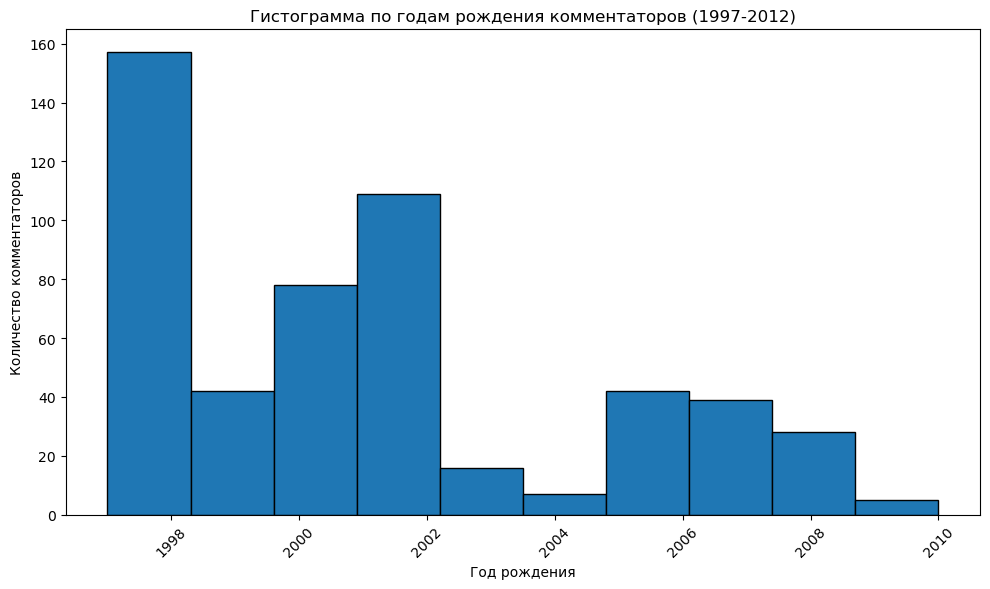

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
df['bdate'] = pd.to_datetime(df['bdate'], infer_datetime_format=True, errors='coerce')

# Check for invalid dates (NaT)
invalid_dates = df['bdate'].isnull()
if invalid_dates.any():
    # Handle invalid dates
    #  Option 1: Remove invalid rows
    df = df[~invalid_dates] 
    #  Option 2: Try manual parsing 
    #  (Requires identifying patterns in invalid dates)

# Extract year
df['year'] = df['bdate'].dt.year

# Filter for years between 1997 and 2012
df = df[(df['year'] >= 1997) & (df['year'] <= 2012)]

# Create the histogram
plt.figure(figsize=(10, 6))  
plt.hist(df['year'], bins=10, edgecolor='black')
plt.xlabel('Год рождения')
plt.ylabel('Количество комментаторов')
plt.title('Гистограмма по годам рождения комментаторов (1997-2012)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
from transformers import pipeline 

In [95]:
df

,post_id,owner_id,from_id,text,sex,bdate,city,comment_date,year
24,38537,-52257710,378033642,"Настоящий спектакль-тот, который вызывает Ажио...",1,1998-12-06,unknown,15.06.2024,1998
46,38483,-52257710,10456275,Спасибо за вечер красоты. Браво🎉🎉🎉,1,1998-12-06,unknown,14.06.2024,1998
51,38481,-52257710,60741434,Теперь с нетерпением ждём Мариинскую версию «К...,2,1998-12-26,"{'id': 1, 'title': 'Moscow'}",14.06.2024,1998
58,38463,-52257710,447084399,Почему дескриминация по возрасту? Совсем стыд...,1,2005-09-28,unknown,14.06.2024,2005
61,38440,-52257710,32447368,Спектакль 13 числа незабываем. 4 часа промчали...,1,1998-12-06,unknown,15.06.2024,1998
...,...,...,...,...,...,...,...,...,...
11826,2151,-52257710,139223803,,1,2003-10-26,"{'id': 1, 'title': 'Moscow'}",16.10.2015,2003
11901,1775,-52257710,301405385,"[id45486217|Рома], спасибо",1,2001-07-20,"{'id': 650, 'title': 'Dnipro (Dnipropetrovsk)'}",22.07.2015,2001
11960,1413,-52257710,305642671,крута,1,1999-03-11,"{'id': 1, 'title': 'Moscow'}",19.05.2015,1999
11965,1401,-52257710,232897575,я тоже,2,2002-01-14,"{'id': 8341, 'title': 'Kichmengsky Gorodok'}",11.05.2015,2002


In [98]:
import nltk

nltk.download("stopwords")
nltk.download('punkt')

from nltk.corpus import stopwords  # Import stopwords
stop_words = stopwords.words("russian")
m = Mystem()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Семён\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Семён\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [99]:
import re 

url_pattern = re.compile(r'https?://\S+|www\.\S+')
def remove_urls(text):
    return url_pattern.sub(r' ', text)

date_pattern = re.compile(r"(\d{2}\.\d{2}\.?\d{0,4}?)\s")
def replace_dates(text):
    return date_pattern.sub(r'дата', text)

nonword_pattern = re.compile(r'[^а-яА-ЯёЁa-zA-Z\s\(\)]+')
def remove_nonwords(text):
    return nonword_pattern.sub(r' ', text)

money_pattern = re.compile(r"(\sр\s|руб)")
def replace_money_after_nonword(text):
    return money_pattern.sub(r'рублей', text)

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text).strip()

def remove_unicode_chars(text):
    text = text.encode("utf8", "ignore").decode()
    return text

def remove_brackets(text):
    return text.replace("(", " ").replace(")", " ")

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text).strip()

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stopwords(tokens):
    return list([t for t in tokens if t not in stop_words])

def lemmatize(tokens):
    lemmatized = []
    for t in tokens:
        lemma = m.lemmatize(t)[0]
        lemmatized.append(lemma)
    return lemmatized

In [100]:
def process_text(text, processors=[
        remove_urls,
        replace_dates,
        remove_nonwords,
        replace_money_after_nonword,
        remove_extra_spaces,
        remove_unicode_chars,
    ]):
    for f in processors:
        text = f(text)
    return text

In [101]:
df['processed_text'] = df['text'].apply(process_text)

In [113]:
df

,post_id,owner_id,from_id,text,sex,bdate,city,comment_date,year,processed_text,processed_text_tfidf_tokens
24,38537,-52257710,378033642,"Настоящий спектакль-тот, который вызывает Ажио...",1,1998-12-06,unknown,15.06.2024,1998,Настоящий спектакль тот который вызывает Ажиот...,"[Настоящий, спектакль, который, вызывает, Ажио..."
46,38483,-52257710,10456275,Спасибо за вечер красоты. Браво🎉🎉🎉,1,1998-12-06,unknown,14.06.2024,1998,Спасибо за вечер красоты Браво,"[Спасибо, вечер, красоты, Браво]"
51,38481,-52257710,60741434,Теперь с нетерпением ждём Мариинскую версию «К...,2,1998-12-26,"{'id': 1, 'title': 'Moscow'}",14.06.2024,1998,Теперь с нетерпением ждём Мариинскую версию Ко...,"[Теперь, нетерпением, ждём, Мариинскую, версию..."
58,38463,-52257710,447084399,Почему дескриминация по возрасту? Совсем стыд...,1,2005-09-28,unknown,14.06.2024,2005,Почему дескриминация по возрасту Совсем стыд п...,"[Почему, дескриминация, возрасту, Совсем, стыд..."
61,38440,-52257710,32447368,Спектакль 13 числа незабываем. 4 часа промчали...,1,1998-12-06,unknown,15.06.2024,1998,Спектакль числа незабываем часа промчались нез...,"[Спектакль, числа, незабываем, часа, промчалис..."
...,...,...,...,...,...,...,...,...,...,...,...
11826,2151,-52257710,139223803,,1,2003-10-26,"{'id': 1, 'title': 'Moscow'}",16.10.2015,2003,,[]
11901,1775,-52257710,301405385,"[id45486217|Рома], спасибо",1,2001-07-20,"{'id': 650, 'title': 'Dnipro (Dnipropetrovsk)'}",22.07.2015,2001,id Рома спасибо,"[id, Рома, спасибо]"
11960,1413,-52257710,305642671,крута,1,1999-03-11,"{'id': 1, 'title': 'Moscow'}",19.05.2015,1999,крута,[крута]
11965,1401,-52257710,232897575,я тоже,2,2002-01-14,"{'id': 8341, 'title': 'Kichmengsky Gorodok'}",11.05.2015,2002,я тоже,[]


In [116]:
df

,post_id,owner_id,from_id,text,sex,bdate,city,comment_date,year,processed_text,processed_text_tfidf_tokens
24,38537,-52257710,378033642,"Настоящий спектакль-тот, который вызывает Ажио...",1,1998-12-06,unknown,15.06.2024,1998,Настоящий спектакль тот который вызывает Ажиот...,"[Настоящий, спектакль, который, вызывает, Ажио..."
46,38483,-52257710,10456275,Спасибо за вечер красоты. Браво🎉🎉🎉,1,1998-12-06,unknown,14.06.2024,1998,Спасибо за вечер красоты Браво,"[Спасибо, вечер, красоты, Браво]"
51,38481,-52257710,60741434,Теперь с нетерпением ждём Мариинскую версию «К...,2,1998-12-26,"{'id': 1, 'title': 'Moscow'}",14.06.2024,1998,Теперь с нетерпением ждём Мариинскую версию Ко...,"[Теперь, нетерпением, ждём, Мариинскую, версию..."
58,38463,-52257710,447084399,Почему дескриминация по возрасту? Совсем стыд...,1,2005-09-28,unknown,14.06.2024,2005,Почему дескриминация по возрасту Совсем стыд п...,"[Почему, дескриминация, возрасту, Совсем, стыд..."
61,38440,-52257710,32447368,Спектакль 13 числа незабываем. 4 часа промчали...,1,1998-12-06,unknown,15.06.2024,1998,Спектакль числа незабываем часа промчались нез...,"[Спектакль, числа, незабываем, часа, промчалис..."
...,...,...,...,...,...,...,...,...,...,...,...
11826,2151,-52257710,139223803,,1,2003-10-26,"{'id': 1, 'title': 'Moscow'}",16.10.2015,2003,,[]
11901,1775,-52257710,301405385,"[id45486217|Рома], спасибо",1,2001-07-20,"{'id': 650, 'title': 'Dnipro (Dnipropetrovsk)'}",22.07.2015,2001,id Рома спасибо,"[id, Рома, спасибо]"
11960,1413,-52257710,305642671,крута,1,1999-03-11,"{'id': 1, 'title': 'Moscow'}",19.05.2015,1999,крута,[крута]
11965,1401,-52257710,232897575,я тоже,2,2002-01-14,"{'id': 8341, 'title': 'Kichmengsky Gorodok'}",11.05.2015,2002,я тоже,[]


In [32]:
import PIL
from transformers import pipeline # Импорт функции pipeline

# Загружаем предобученную модель
classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment")

# Проводим сентимент-анализ
df['sentiment'] = df['text'].apply(lambda text: classifier(text)[0]['label'])

# Выводим результаты
print(df[['text', 'sentiment']])

                                                    text sentiment
24     Настоящий спектакль-тот, который вызывает Ажио...  NEGATIVE
46                   Спасибо за вечер красоты.  Браво🎉🎉🎉  POSITIVE
51     Теперь с нетерпением ждём Мариинскую версию «К...  POSITIVE
58     Почему дескриминация по возрасту?  Совсем стыд...  NEGATIVE
61     Спектакль 13 числа незабываем. 4 часа промчали...   NEUTRAL
...                                                  ...       ...
11826                                                      NEUTRAL
11901                         [id45486217|Рома], спасибо  POSITIVE
11960                                              крута  POSITIVE
11965                                             я тоже   NEUTRAL
12052  Почему-то в Пскове в кинотеатрах не показывают...   NEUTRAL

[523 rows x 2 columns]


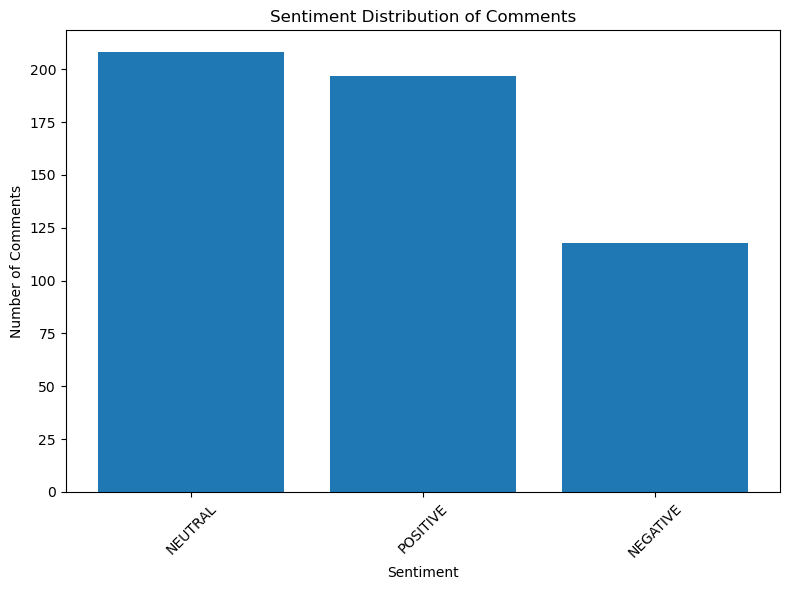

In [33]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has a column named 'sentiment' 
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment Distribution of Comments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

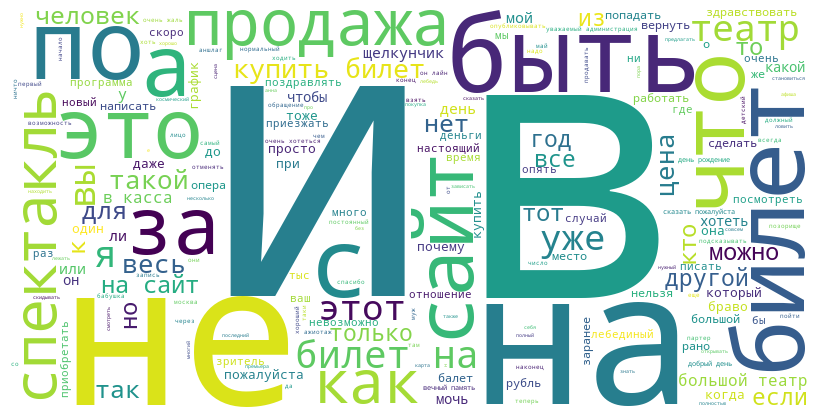

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example list of words
positive_lem = negative_lem

# Join the list into a string
positive_text = " ".join(positive_lem)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [65]:
from pymystem3 import Mystem
m = Mystem()

# Filter data by sentiment and lemmatize
positive_texts = df[df['sentiment'] == 'POSITIVE']['processed_text'].tolist()
positive_lem = m.lemmatize(' '.join(positive_texts))

neutral_texts = df[df['sentiment'] == 'NEUTRAL']['processed_text'].tolist()
neutral_lem = m.lemmatize(' '.join(neutral_texts))

negative_texts = df[df['sentiment'] == 'NEGATIVE']['processed_text'].tolist()
negative_lem = m.lemmatize(' '.join(negative_texts))

In [57]:
df['processed_text'] = df['text'].apply(process_text)

In [63]:
df

,post_id,owner_id,from_id,text,sex,bdate,city,comment_date,year,sentiment,processed_text
24,38537,-52257710,378033642,"Настоящий спектакль-тот, который вызывает Ажио...",1,1998-06-12,unknown,15.06.2024,1998,NEGATIVE,Настоящий спектакль тот который вызывает Ажиот...
46,38483,-52257710,10456275,Спасибо за вечер красоты. Браво🎉🎉🎉,1,1998-06-12,unknown,14.06.2024,1998,POSITIVE,Спасибо за вечер красоты Браво
51,38481,-52257710,60741434,Теперь с нетерпением ждём Мариинскую версию «К...,2,1998-12-26,"{'id': 1, 'title': 'Moscow'}",14.06.2024,1998,POSITIVE,Теперь с нетерпением ждём Мариинскую версию Ко...
58,38463,-52257710,447084399,Почему дескриминация по возрасту? Совсем стыд...,1,2005-09-28,unknown,14.06.2024,2005,NEGATIVE,Почему дескриминация по возрасту Совсем стыд п...
61,38440,-52257710,32447368,Спектакль 13 числа незабываем. 4 часа промчали...,1,1998-06-12,unknown,15.06.2024,1998,NEUTRAL,Спектакль числа незабываем часа промчались нез...
...,...,...,...,...,...,...,...,...,...,...,...
11826,2151,-52257710,139223803,,1,2003-10-26,"{'id': 1, 'title': 'Moscow'}",16.10.2015,2003,NEUTRAL,
11901,1775,-52257710,301405385,"[id45486217|Рома], спасибо",1,2001-07-20,"{'id': 650, 'title': 'Dnipro (Dnipropetrovsk)'}",22.07.2015,2001,POSITIVE,id Рома спасибо
11960,1413,-52257710,305642671,крута,1,1999-11-03,"{'id': 1, 'title': 'Moscow'}",19.05.2015,1999,POSITIVE,крута
11965,1401,-52257710,232897575,я тоже,2,2002-01-14,"{'id': 8341, 'title': 'Kichmengsky Gorodok'}",11.05.2015,2002,NEUTRAL,я тоже


In [123]:
stop_words = set(stopwords.words('russian'))
stop_words

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [202]:
new_df = df.head(5).copy()
#print(new_df['processed_text_tfidf_tokens'][24])
new_df

,post_id,owner_id,from_id,text,sex,bdate,city,comment_date,year,processed_text,processed_text_tfidf_tokens
24,38537,-52257710,378033642,"Настоящий спектакль-тот, который вызывает Ажио...",1,1998-12-06,unknown,15.06.2024,1998,Настоящий спектакль тот который вызывает Ажиот...,"[Настоящий, спектакль, который, вызывает, Ажио..."
46,38483,-52257710,10456275,Спасибо за вечер красоты. Браво🎉🎉🎉,1,1998-12-06,unknown,14.06.2024,1998,Спасибо за вечер красоты Браво,"[Спасибо, вечер, красоты, Браво]"
51,38481,-52257710,60741434,Теперь с нетерпением ждём Мариинскую версию «К...,2,1998-12-26,"{'id': 1, 'title': 'Moscow'}",14.06.2024,1998,Теперь с нетерпением ждём Мариинскую версию Ко...,"[Теперь, нетерпением, ждём, Мариинскую, версию..."
58,38463,-52257710,447084399,Почему дескриминация по возрасту? Совсем стыд...,1,2005-09-28,unknown,14.06.2024,2005,Почему дескриминация по возрасту Совсем стыд п...,"[Почему, дескриминация, возрасту, Совсем, стыд..."
61,38440,-52257710,32447368,Спектакль 13 числа незабываем. 4 часа промчали...,1,1998-12-06,unknown,15.06.2024,1998,Спектакль числа незабываем часа промчались нез...,"[Спектакль, числа, незабываем, часа, промчалис..."


In [203]:
import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
import re
import pandas as pd

stop_words = stopwords.words("russian")
m = Mystem(entire_input=True)  # Load dictionaries once

url_pattern = re.compile(r'https?://\S+|www\.\S+')
def remove_urls(text):
    return url_pattern.sub(r' ', text)

date_pattern = re.compile(r"(\d{2}\.\d{2}\.?\d{0,4}?)\s")
def replace_dates(text):
    return date_pattern.sub(r'дата', text)

nonword_pattern = re.compile(r'[^а-яА-ЯёЁa-zA-Z\s\(\)]+')
def remove_nonwords(text):
    return nonword_pattern.sub(r' ', text)

money_pattern = re.compile(r"(\sр\s|руб)")
def replace_money_after_nonword(text):
    return money_pattern.sub(r'рублей', text)

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text).strip()

def remove_unicode_chars(text):
    text = text.encode("utf8", "ignore").decode()
    return text

def remove_brackets(text):
    return text.replace("(", " ").replace(")", " ")

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text).strip()

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stopwords(tokens):
    return list([t for t in tokens if t not in stop_words])

def lemmatize_batch(tokens, batch_size=100):  # Batch lemmatization
    lemmatized = []
    for i in range(0, len(tokens), batch_size):
        batch = tokens[i:i+batch_size]
        lemmas = m.lemmatize(" ".join(batch))
        lemmatized.extend([lemma.get('analysis', [{}])[0].get('lex', '') for lemma in lemmas])
    return lemmatized

def process_text(text, processors=[
        remove_urls,
        replace_dates,
        remove_nonwords,
        replace_money_after_nonword,
        remove_extra_spaces,
        remove_unicode_chars,
    ]):
    for f in processors:
        text = f(text)
    return text

def process_text_tfidf(text, processors=[
        tokenize,
        remove_stopwords,
        lemmatize,
    ]):
    for f in processors:
        text = f(text)
    return text

In [211]:
new_df['processed_text'] = new_df['text'].apply(process_text)

In [222]:
stop_words = stopwords.words("russian")
m = Mystem(entire_input=True) 

# ... (Your preprocessing functions: remove_urls, replace_dates, etc.)

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stopwords(tokens):
    return list([t for t in tokens if t not in stop_words])

import pymorphy2

morph = pymorphy2.MorphAnalyzer()

def lemmatize_batch(tokens, batch_size=100):
   lemmatized = []
   for i in range(0, len(tokens), batch_size):
       batch = tokens[i:i+batch_size]
       for word in batch:
           lemmas = morph.parse(word)
           lemmatized.append(lemmas[0].normal_form)
   return lemmatized

def process_text(text): 
    # Preprocess text
    text = remove_urls(text)
    text = replace_dates(text)
    text = remove_nonwords(text)
    text = replace_money_after_nonword(text)
    text = remove_extra_spaces(text)
    text = remove_unicode_chars(text)
    text = remove_brackets(text)
    text = remove_extra_spaces(text)

    # Tokenize and remove stop words
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)

    return tokens 

new_df['processed_text'] = new_df['text'].apply(process_text)
new_df['lemmatized_tokens'] = new_df['processed_text'].apply(lambda tokens: lemmatize_batch(tokens))
new_df

AttributeError: module 'inspect' has no attribute 'getargspec'

In [205]:
new_df['processed_text_tfidf_tokens'] = new_df['processed_text'].apply(process_text_tfidf)

In [206]:
import PIL
from transformers import pipeline # Импорт функции pipeline
import pandas as pd

# Загружаем предобученную модель
classifier = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment")

# Проводим сентимент-анализ
new_df['sentiment'] = new_df['processed_text_tfidf_tokens'].apply(lambda text: classifier(text)[0]['label'] if classifier(text) else 'unknown')

# Удаляем строки с "unknown" sentiment
new_df = new_df[new_df['sentiment'] != 'unknown']

# Выводим результаты
print(new_df[['processed_text_tfidf_tokens', 'sentiment']])

                          processed_text_tfidf_tokens sentiment
24  [настоящий, спектакль, который, вызывать, ажио...  POSITIVE
46                   [спасибо, вечер, красота, браво]  POSITIVE
51  [теперь, нетерпение, ждать, мариинский, версия...   NEUTRAL
58  [почему, дескриминация, возраст, совсем, стыд,...  NEGATIVE
61  [спектакль, число, незабываемый, час, промчать...   NEUTRAL


In [208]:
from pymystem3 import Mystem
m = Mystem()

# Filter data by sentiment and lemmatize
new_positive_texts = new_df[new_df['sentiment'] == 'POSITIVE']['processed_text'].tolist()
new_positive_lem = m.lemmatize(' '.join(new_positive_texts))

new_neutral_texts = new_df[new_df['sentiment'] == 'NEUTRAL']['processed_text'].tolist()
new_neutral_lem = m.lemmatize(' '.join(new_neutral_texts))

new_negative_texts = new_df[new_df['sentiment'] == 'NEGATIVE']['processed_text'].tolist()
new_negative_lem = m.lemmatize(' '.join(new_negative_texts))

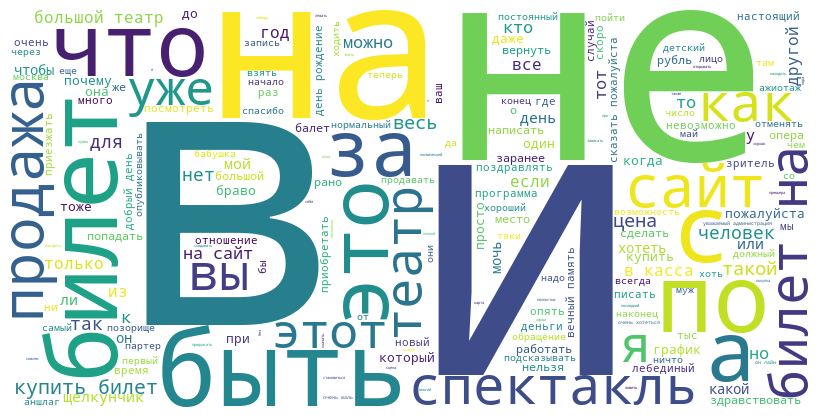

In [215]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join the list into a string
new_positive_text = " ".join(positive_lem)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(new_positive_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [226]:
new_positive_texts

['Настоящий спектакль тот который вызывает Ажиотаж и Аншлаг Тот на который билеты разбираются за несколько дней В Большом театре уже давно нет аншлагов Билеты зависают до последнего с такими ценами Разве таким должен быть Лучший театр страны Публика оторви и брось ходит по таким ценам в туалетах стали курить ( вспомнить случай с эвакуацией) \nДон Кихот рекламируют в интернете раньше он был один из самых популярных балетов Скоро походу и Лебеди станут не нужны по Космическим ценам',
 'Спасибо за вечер красоты Браво']

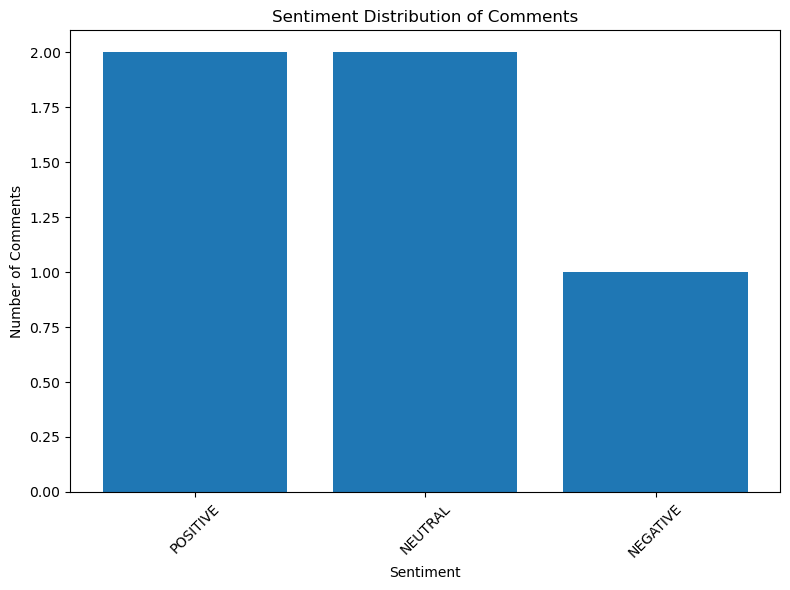

In [210]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has a column named 'sentiment' 
sentiment_counts = new_df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Sentiment Distribution of Comments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Визуализация данных